In [131]:
import numpy as np
from scipy.stats import kurtosis
from scipy.fft import fft2, fftshift
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from tqdm.contrib import tenumerate
import os

In [134]:
def calc_2D_spectrum(img):
    img_fft = np.abs(fftshift(fft2(img, workers=15))) ** 2
    return img_fft

def brightness_corr(spectrum):
    """Normalize the power spectrum to account for image-to-image brightness variation."""
    return spectrum / np.mean(spectrum) / spectrum.size

def calc_1D_spectrum_from_2D_spectrum(spectrum):
    """Create 1D spectrum from 2D spectrum"""

    # Sum the sums of the columns and the rows.
    summed_spectrum = np.zeros(spectrum.shape[0])
    column_sum = np.sum(spectrum, axis=0)
    row_sum = np.sum(spectrum, axis=1)
    summed_spectrum = column_sum + row_sum

    # "... and then adding corresponding 'negative' frequencies to the
    # 'positive' ones. This results in a N/2+1 1D array."
    spectrum_mid_idx = len(summed_spectrum) // 2
    summed_spectrum_pos = summed_spectrum[spectrum_mid_idx:] + np.flip(summed_spectrum[:spectrum_mid_idx])
    return summed_spectrum_pos

In [114]:
def select_channel(img, channel=0):
    try:
        return img[:, :, channel]
    except IndexError:
        return img

In [146]:
def select_high_frequencies(spectrum: np.ndarray, threshold: float):
    frequencies = np.linspace(0, 1, len(spectrum))
    return spectrum[frequencies > (threshold * np.max(frequencies))]

In [156]:
def calc_kurtosis_of_stack(directory: str, threshold: float, norm: bool = False):
    # Glob does not do filename sorting, so we have to do it manually.
    img_paths = sorted(
        glob(f"{directory}/*.bmp"),
        key=lambda x: int(os.path.basename(x).split('.')[0])
    )

    all_kurtosis = np.zeros(len(img_paths))
    for i, img_path in tenumerate(img_paths):
        img_pil = Image.open(img_path)
        img_arr = np.asarray(img_pil)
        img = select_channel(img_arr)

        spectrum_2d = calc_2D_spectrum(img)
        spectrum_2d_corr = brightness_corr(spectrum_2d)
        spectrum_1d = calc_1D_spectrum_from_2D_spectrum(spectrum_2d_corr)
        high_freq = select_high_frequencies(spectrum_1d, threshold)
        spectrum_kurtosis = kurtosis(high_freq, fisher=False)

        all_kurtosis[i] = spectrum_kurtosis
    
    if norm:
        all_kurtosis_normed = all_kurtosis / np.max(all_kurtosis)
    else:
        all_kurtosis_normed = all_kurtosis
    
    return all_kurtosis_normed

In [157]:
def determine_directory_order(directory):
    try:
        return int(directory.split('/')[3])
    except ValueError:
        return np.inf

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

/tmp/ipykernel_3903116/1682627965.py:7: RuntimeWarning: invalid value encountered in divide
  return spectrum / np.mean(spectrum) / spectrum.size


  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

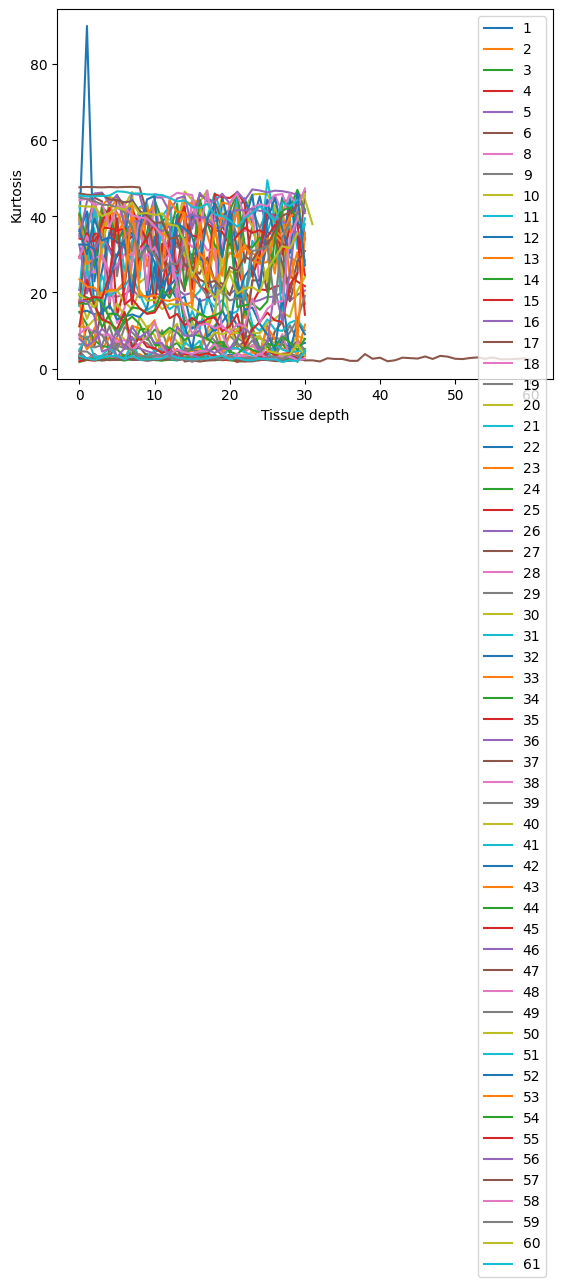

In [163]:
directories = sorted(
    glob("../data/z-stacks/**/"),
    key=determine_directory_order # Glob doesn't automatically order directories.
)[:-2] # Drop the unsorted and unsure directories.

for directory in directories:
    # Flip the kurtosis, because we image the skin from below.
    # Every power below the threshold will be disregarded.
    kurtosis_along_depth = calc_kurtosis_of_stack(directory, 0.8)
    plt.plot(
        np.flip(kurtosis_along_depth),
        label=directory.split('/')[-2]
    )
    plt.xlabel("Tissue depth")
    plt.ylabel("Kurtosis")

plt.legend()
plt.show()